In [1]:
 #Import necessary libraries to carry out this classification
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
import keras

In [2]:
 (x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
print("Number of images in training set {}".format(x_train.shape))
print("Number of labels in training set {}".format(y_train.shape))
print("Number of images in test set {}".format(x_test.shape))
print("Number of labels in test set {}".format(y_train.shape))

Number of images in training set (60000, 28, 28)
Number of labels in training set (60000,)
Number of images in test set (10000, 28, 28)
Number of labels in test set (60000,)


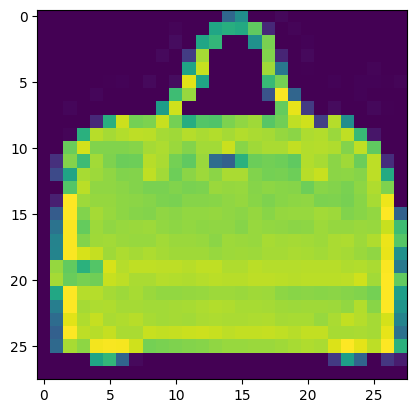

In [5]:
plt.figure()
plt.imshow(np.squeeze(x_train[220]))

In [6]:
 y_train[220]

8

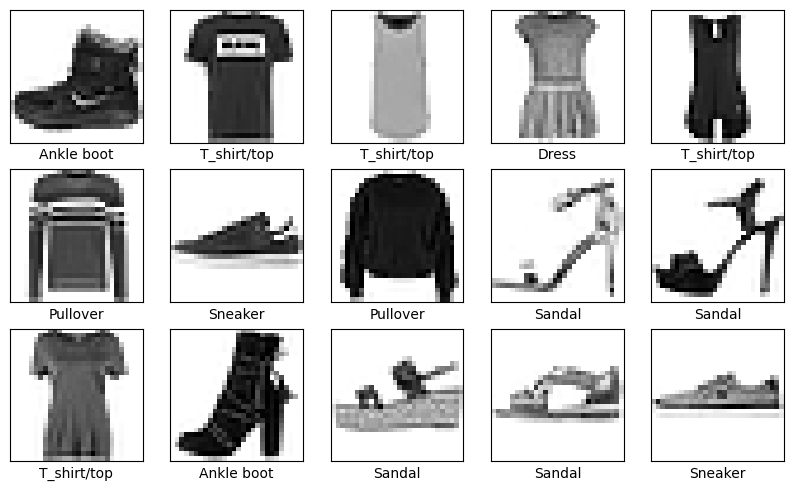

In [7]:
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
x_train=x_train/255
x_test=x_test/255

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [10]:
cnn_model = Sequential()

In [11]:
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))

In [12]:
cnn_model.add(MaxPooling2D(pool_size= (2,2)))

In [13]:
cnn_model.add(Flatten())

In [14]:
cnn_model.add(Dense(32,activation = 'relu'))

In [15]:
cnn_model.add(Dense(10,activation = 'sigmoid'))

In [16]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 32)                16416     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 17,066
Trainable params: 17,066
Non-trainable params: 0
____________________________________________________

In [17]:
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])


In [18]:
history=cnn_model.fit(x_train,y_train,batch_size =512,epochs = 5,verbose = 1,validation_data = (x_test,y_test) )

Epoch 1/5
118/118 [==============================] - 2s 9ms/step - loss: 1.3169 - accuracy: 0.6124 - val_loss: 0.7286 - val_accuracy: 0.7449
Epoch 2/5
118/118 [==============================] - 1s 7ms/step - loss: 0.6337 - accuracy: 0.7736 - val_loss: 0.5942 - val_accuracy: 0.7881
Epoch 3/5
118/118 [==============================] - 1s 7ms/step - loss: 0.5496 - accuracy: 0.8031 - val_loss: 0.5426 - val_accuracy: 0.8068
Epoch 4/5
118/118 [==============================] - 1s 12ms/step - loss: 0.5064 - accuracy: 0.8175 - val_loss: 0.5201 - val_accuracy: 0.8140
Epoch 5/5
118/118 [==============================] - 2s 13ms/step - loss: 0.4790 - accuracy: 0.8273 - val_loss: 0.5012 - val_accuracy: 0.8132


In [19]:
cnn_model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.8132


[0.5012354254722595, 0.8131999969482422]

In [20]:
probability_model = tf.keras.Sequential([cnn_model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

313/313 [==============================] - 0s 994us/step


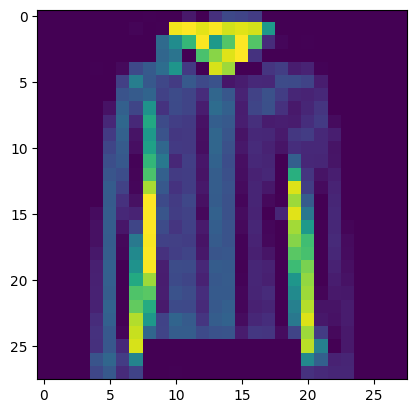

In [21]:
img = x_test[6]
plt.imshow(img)

In [22]:
y_predict = class_names[np.argmax(predictions[6])]
y_predict

'Shirt'

In [23]:
y_actual = class_names[y_test[6]]
y_actual

'Coat'

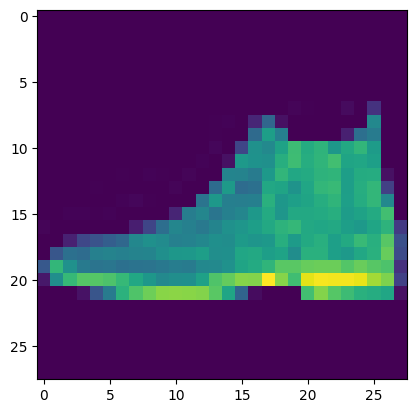

In [24]:
img = x_test[0]
plt.imshow(img)

In [25]:
y_predict = class_names[np.argmax(predictions[0])]
y_predict

'Ankle boot'

In [26]:
 y_actual = class_names[y_test[0]]
y_actual

'Ankle boot'

In [27]:
test_loss, test_accuracy = cnn_model.evaluate(x_train, y_train)

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4714 - accuracy: 0.8292


In [28]:
print(test_accuracy)

0.8292333483695984


In [29]:
 print(test_loss)

0.47139763832092285


In [30]:
 history.history??

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

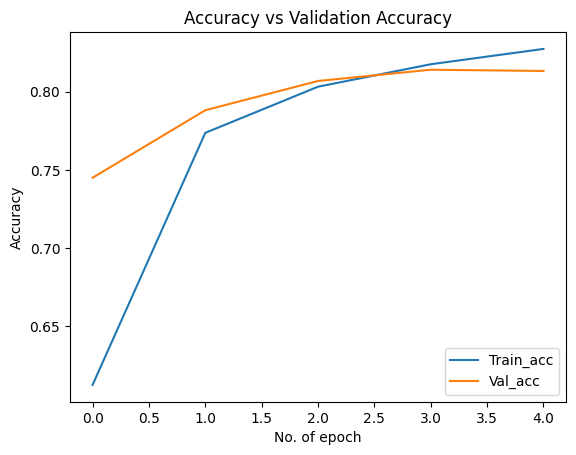

In [32]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy vs Validation Accuracy")
plt.xlabel("No. of epoch")
plt.ylabel("Accuracy")
plt.legend(['Train_acc', 'Val_acc'], loc='lower right')
plt.show()